In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('teleCust1000t.csv')

In [60]:
labels = {
    1: 'Basic Service',
    2: 'E-Service',
    3: 'Plus Service',
    4: 'Total Service'
}

In [10]:
df.head(10)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
5,2,41,39,0,17,78.0,2,16,0.0,1,1,3
6,3,45,22,1,2,19.0,2,4,0.0,1,5,2
7,2,38,35,0,5,76.0,2,10,0.0,0,3,4
8,3,45,59,1,7,166.0,4,31,0.0,0,5,3
9,1,68,41,1,21,72.0,1,22,0.0,0,3,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [13]:
df.shape

(1000, 12)

In [20]:
df.isna().any()

region     False
tenure     False
age        False
marital    False
address    False
income     False
ed         False
employ     False
retire     False
gender     False
reside     False
custcat    False
dtype: bool

In [79]:
df.describe(include='all')

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5FCEDB108>,
      dtype=object)

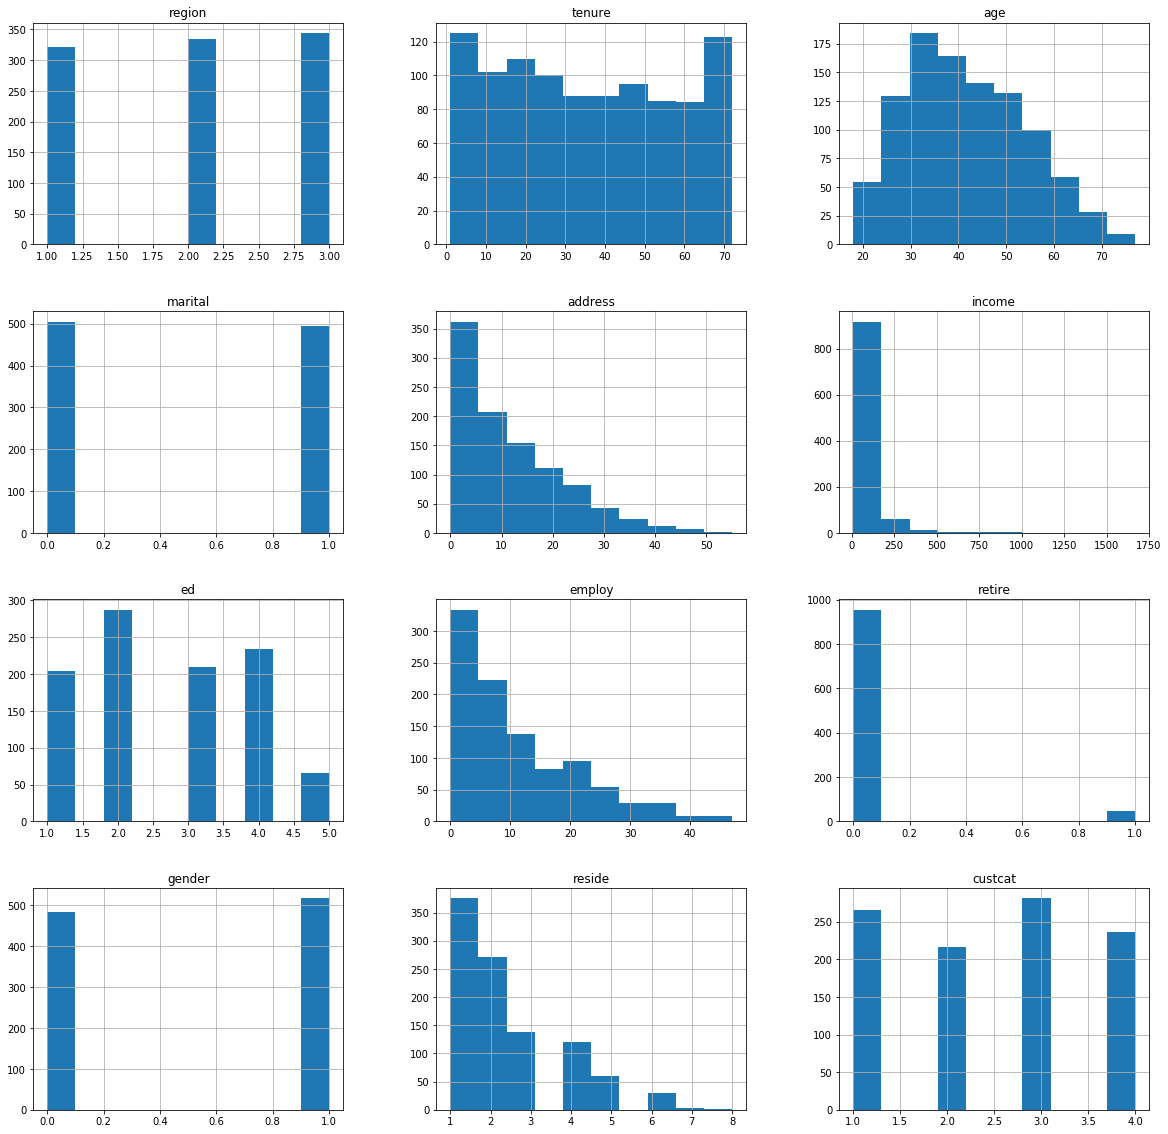

In [83]:
df.hist(figsize=(20, 20))

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
accVals = []
x_axis = range(1, 11)
for k in x_axis:
    test_model = KNeighborsClassifier(n_neighbors=k)
    accVals.append(accuracy_score(test_model.fit(X_train, y_train).predict(X_test), y_test))
# End For 
best_k = np.argmax(accVals) + 1

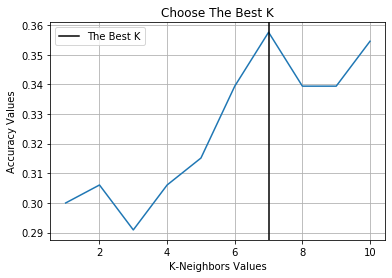

In [78]:
plt.plot(x_axis, accVals)
plt.axvline(x = best_k, label='The Best K', c='k')
plt.title('Choose The Best K')
plt.xlabel('K-Neighbors Values')
plt.ylabel('Accuracy Values')
plt.grid()
plt.legend()
plt.show()

Accuracy: 0.3575757575757576
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.40      0.47       129
           2       0.23      0.29      0.26        58
           3       0.32      0.33      0.32        85
           4       0.28      0.36      0.31        58

    accuracy                           0.36       330
   macro avg       0.35      0.35      0.34       330
weighted avg       0.39      0.36      0.37       330



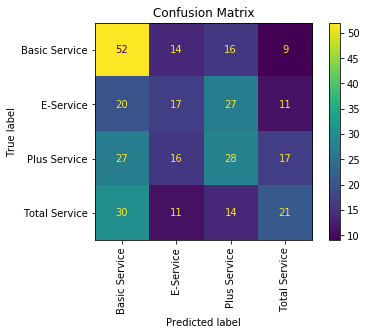

In [76]:
model = KNeighborsClassifier(n_neighbors=best_k)
y_predict = model.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_predict, y_test)
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report(y_predict, y_test))
plot_confusion_matrix(model, X_test, y_test, display_labels = list(labels.values()), xticks_rotation = 'vertical')
plt.title('Confusion Matrix')
plt.show()